In [24]:
#importing stuff and defining non important things

import matplotlib.pyplot as plt
import numpy as np

from scipy.constants import hbar, e

#pauli matrices
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

Let the two valley indexes be $K_0,K_1$

$-e\mathbf J_{K_{\alpha}}(\mathbf r)= \sum_{\beta\in \{0,1\}} \sigma_{K_\alpha K_\beta}(\mathbf r)\nabla \psi_{K_\beta}(\mathbf r)$

$ \psi_{K_\beta}(\mathbf r)$ is the elettrochemical potential

$ \psi_{K_\beta}(\mathbf r) = V(\mathbf r) - \frac 1e \frac{\partial}{\partial n_{K_\beta}} F(n_{K_0},n_{K_1}, T)$

where  $F(n_{K_0},n_{K_1}, T)$ is the free energy density in term of the local valley density $n_{K_\alpha}(\mathbf r)$, this means that 

$\mu (n_{K_0},n_{K_{1}}, T)=\frac{\partial}{\partial n_{K_\beta}} F(n_{K_0},n_{K_{1}}, T)$

From now on we are going to assume $T=0$, so the electron will have a step distibution

The enegy eigenvalues of a Dirac Hamiltonian are 

$E=\pm \sqrt{\Delta^2 + k_x^2+k_y^2}$

and the Berry curvature is

$\Omega_{K_0}(\mathbf k)=-\Omega_{K_1}(\mathbf k)=\frac 12 \frac{\mathbf k}{(k^2+\Delta^2)^{2/3}}$ FORSE è SBAGLIATO

In [23]:
# Eigenvalues of the Hamiltonian
def DiracEnergy(k_x,k_y,delta=0):
    dispersion_vector=np.array([k_x,k_y,delta])
    return np.linalg.norm(dispersion_vector)

#Berry curvature of the hamiltonian in terms of k_x and k_y
def BerryCurvatureDiracHamiltonian(k_x,k_y,delta=0):
    return np.array([k_x,k_y,delta])/2*DiracEnergy(k_x,k_y,delta)**3

/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_80110/1460962824.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dispersion_vector=np.array([k_x,k_y,delta])


Text(0, 0.5, 'E(k)')

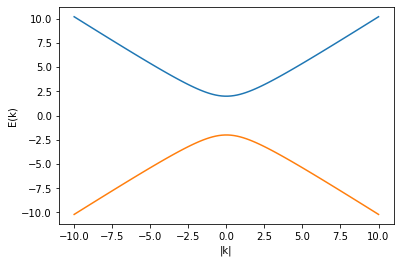

In [21]:
#plot the eigenvalues of the hamiltonian

x=np.linspace(-10,10,100)
y1=DiracEnergy(x,2)
y2=-DiracEnergy(x,2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('|k|')
plt.ylabel('E(k)')

# No intervalley interactions

For now we are going to ignore intervalley scattering, this means that $\sigma_{K_0K_1}=\sigma_{K_1K_0}=0$, and we will write for simplicity the diagonal elements with just one index ($\sigma_{K_\alpha K_\alpha}=\sigma_{K_\alpha}$)

Keep in mind that each $\sigma_{K_\alpha}$ is a matrix that must be simmetric under rotations this means that the elements are in the form


$\sigma_{K_\alpha}=\begin{vmatrix}
\sigma_{K_\alpha,xx} & \sigma_{K_\alpha,xy}\\
-\sigma^*_{K_\alpha,xy} & \sigma_{K_\alpha,xx}
\end{vmatrix}$

The diagonal entries are from the classic conducibility, while the off diagonal elements are from the Berry curvature

$\sigma_{K_\alpha,xy}=\frac {e^2} \hbar\int f(E_k)\Omega_{K_\alpha}(\mathbf k)\frac{d\mathbf k}{(2\pi)^2}$

from this we can notice that $\sigma_{K_\alpha,xy}\in \R$, and since the two valleys have opposite berry curvature $\sigma_{K_0,xy}=-\sigma_{K_1,xy}$

as far as the diagonal elements, we have that $\sigma_{K_0,xx}=\sigma_{K_1,xx}$

This means that we can define 

$\sigma=\begin{vmatrix}
\sigma_{xx} & \sigma_{xy}\\
-\sigma_{xy} & \sigma_{xx}
\end{vmatrix}=\sigma_{xx}\delta_{ij} + \sigma_{xy}\epsilon_{ij}$

such that $\sigma_{K_0}=\sigma$ and $\sigma_{K_1}=\sigma^T$

Now let's calculate $\sigma_{xy}$ via the Berry Hall effect

To actually calculate the hall conducibility first we write everything in terms of the energy

$\rho(E)dE=\frac 2{(2\pi)^2}d^2k=\frac 1{2\pi}d(k^2)=\frac 1{2\pi}d(E^2-\Delta^2)=\frac 1\pi E\Theta (E^2-\Delta^2)dE$

$\Omega_{K_\alpha}(E(\mathbf k))=$

In [22]:
def sigma_xy(fermi_energy):
    energy_density(E,delta)
    

Since the two valleys are now non-interacting the free energy can be written as the sum of the two Free energies

where $F(n_{K_0},n_{K_1})=F_0(n_{K_0}(\mathbf r))+F_1(n_{K_1}(\mathbf r))$

this means that we will have two distinct chemical potentials

$\mu_\alpha(n_{K_\alpha}(\mathbf r))=\frac{\partial}{\partial n_{K_\alpha}}F(n_{K_0},n_{K_1})=\frac{\partial}{\partial n_{K_\alpha}}F_\alpha(n_{K_\alpha}(\mathbf r))$

This simplifies the trasport equation in 

$-e\mathbf J_{K_{\alpha}}(\mathbf r)= \sigma_{K_\alpha}(\mathbf r)\nabla \psi_{K_\alpha}(\mathbf r)$

$\nabla \psi_{K_\alpha}(\mathbf r)=\nabla V(\mathbf r) -\frac 1e \frac{\partial}{\partial n_{K_\alpha}}\mu_\alpha(n_{K_\alpha}(\mathbf r))\nabla n_{K_\alpha}$

Putting everything together, and writing explicitely the coordinates with the indices $i,j$

$-eJ_{K_\alpha,i}(\mathbf r)=\sigma_{K_\alpha, ij}E_j(\mathbf r) -\frac 1e \sigma_{K_\alpha, ij}\frac{\partial \mu_\alpha}{\partial n_{K_\alpha}}[n_{K_\alpha}(\mathbf r)]\partial _jn_{K_\alpha}(\mathbf r)$

We can shorten the equation above by defining

$e^2D_{K_\alpha,ij}=\sigma_{K_\alpha, ij}\frac{\partial \mu_\alpha}{\partial n_{K_\alpha}}[n_{K_\alpha}(\mathbf r)]$

$-eJ_{K_\alpha,i}(\mathbf r)=\sigma_{K_\alpha, ij}E_j(\mathbf r) -eD_{K_\alpha,ij}\partial _jn_{K_\alpha}(\mathbf r)$

or, in matrix form

$-e\mathbf J_{K_\alpha}(\mathbf r)=\sigma_{K_\alpha}\mathbf E(\mathbf r) -eD_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$

where 

$\sigma_{K_\alpha}$ and  $-eD_{K_\alpha}$ are matrices

## Re-writing the equations in terms of charge current and valley current

Now we will write the currents in terms fo the charge current $\mathbf J_{c}=\mathbf J_{K_0}+\mathbf J_{K_1}$ and spin current $\mathbf J_{s}=\mathbf J_{K_0}-\mathbf J_{K_1}$

This means that $\sigma_c=\sigma_{K_0}+\sigma_{K_1}$ and $\sigma_s=\sigma_{K_0}-\sigma_{K_1}$, this means that

$\sigma_c=2\sigma_{xx}\delta_{ij}$ and $\sigma_v=2\sigma_{xy}\epsilon_{ij}$



The term $-eD_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$ is a little harder to traslate. First off we are going to impose the local charge conservation

$n_c(\mathbf r)=n_{K_0}+n_{K_1}\approx 0$, and so 

$n_v(\mathbf r)=n_{K_0}-n_{K_1}=2n_{K_0}=-2n_{K_1}$

Now let's do the sum and the difference of the $D_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$ terms to write them in terms of charge and valleys degrees of freedom

$D_{K_0}\nabla n_{K_0}+D_{K_1}\nabla n_{K_1}=(D_{K_0}-D_{K_1})\nabla n_v(\mathbf r)/2$

$D_{K_0}-D_{K_1}=\sigma \frac{\partial \mu_0}{\partial n_{K_0}}- \sigma^T \frac{\partial \mu_1}{\partial n_{K_1}}$

since $\mu_v=2\mu_0=-2\mu_1$ and $n_v=2n_{K_0}=-2n_{K_1}$

$D_{K_0}-D_{K_1}=\frac 1{e^2}(\sigma-\sigma^T)\frac{\partial \mu_v}{\partial n_v}=\frac 1{e^2}\sigma_v\frac{\partial \mu_v}{\partial n_v}$

so i define 

$D_{cv}=\frac 1{e^2}\sigma_v\frac{\partial \mu_v}{\partial n_v}$

## Notazione

$\omega^2(k)=k^2+l_v^{-2}\quad$ e $\quad l_v^2=D_{v,xx}\tau_v$

$\tan(\theta _{VH})=\sigma _{v,xy}/\sigma _{c,xx}$

# Useless parts

But we need to express the energy in terms of the charge density, and for this we need to calculate the density of states of the Dirac-Hamiltonian wich is equal to

$\rho(E)=\frac 1\pi E\theta(E^2-\Delta^2)$

If $\mu>0$ number of particles in a dirac hamiltonian with a fermi dirac distibution is

$n=\int_0^\mu \rho(E)dE=\frac 1\pi \int_0^\mu E\theta(E^2-\Delta^2)dE=\frac 1\pi\theta(\mu^2-\Delta^2)\int_\Delta^\mu EdE = \frac {\theta(\mu^2-\Delta^2)}{2\pi}(\mu^2-\Delta^2)$

if $\mu<0$ than we do the same, but with holes, so in the end

$n=\frac {\theta(\mu^2-\Delta^2)}{2\pi}(\mu^2-\Delta^2)\textrm{sign} (\mu)$